# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;














# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

## Preparación

In [2]:
data = pd.read_csv('/datasets/taxi.csv', index_col = [0], parse_dates=[0])
data.sort_index(inplace=True)
data = data.resample('1H').sum()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


In [4]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


los datos no tienen valores ausentes y preparamos los datos para cumplir con el análisis de series temporales

## Análisis

<AxesSubplot:xlabel='datetime'>

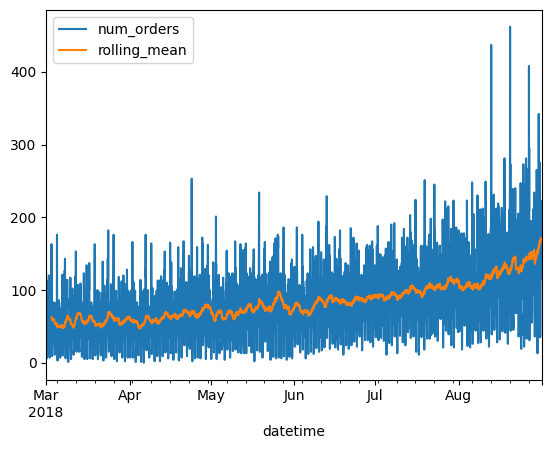

In [5]:
data['rolling_mean'] = data.rolling(50).mean()
data.plot()

la media movil muestra un una tendencia al alza conforme avanzan los meses, tomando su punto máximo en el mes de agosto. Esto podría indicar un aumento en el numero de pedidos de taxis durante el verano ya que se asocia a una época de mayor actividad turística.

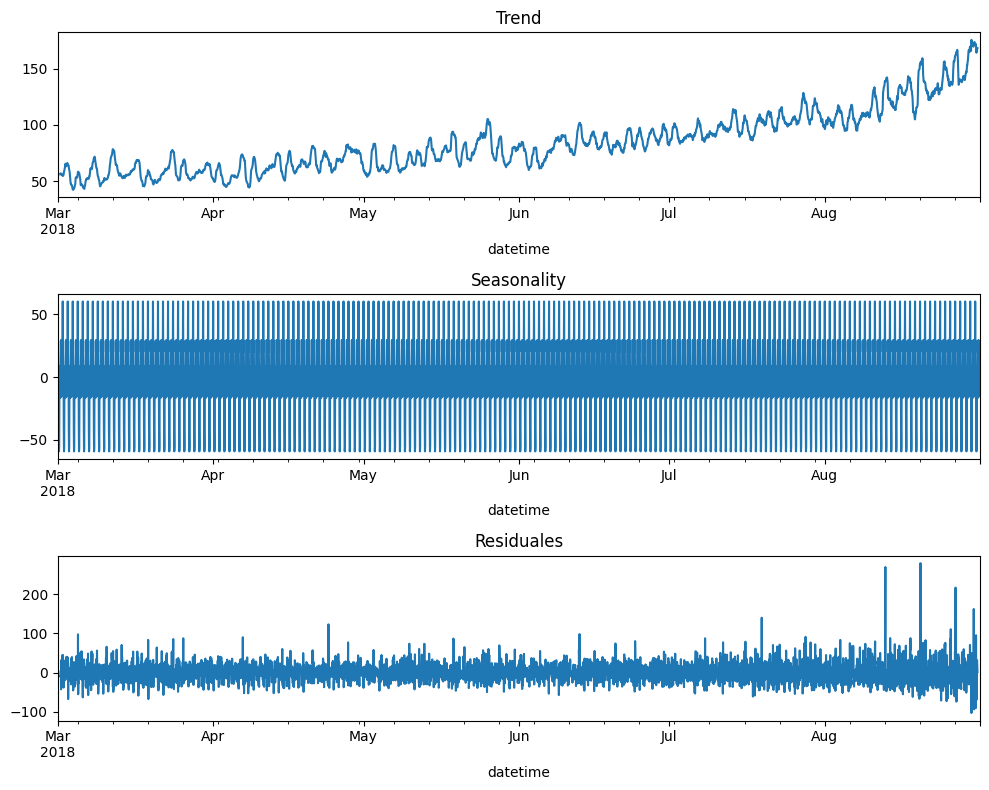

In [6]:
decomposed = seasonal_decompose(data['num_orders'])

plt.figure(figsize=(10, 8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuales')

plt.tight_layout()


Justo como inferimos observando la media movil en la primer gráfica, la tendencia es al alza conforme se acerca el verano.

Hay una fuerte estacionalidad en los datos, observamos que hay patrones oscilantes lo cual sugiere que los pedidos de taxis que se repiten a lo largo de los dias y horas, infiero que el numero de pedidos tendrá picos en ciertas horas del dia, mas adelante usaremos lag 6, 12, 24 y 48 para intentar mejorar la predicción.

con esto concluimos que aunque la tendencia va al alta conforme se acerca el verano, el numero de pedidos de taxi tiene una estacionalidad marcada con patrones recurrentes.


<AxesSubplot:xlabel='datetime'>

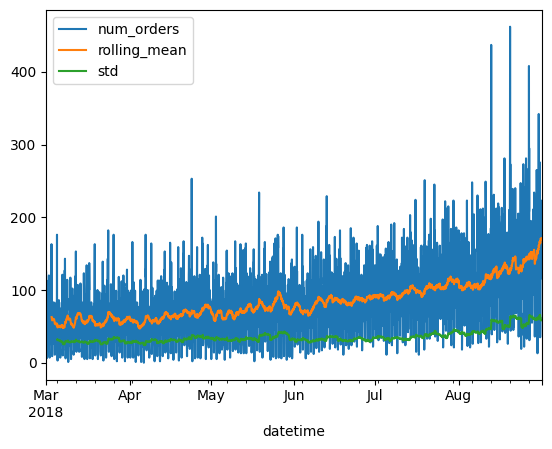

In [7]:
data['std'] = data['num_orders'].rolling(100).std()
data.plot()

No podemos concluir que la seríe sea estacionaria ya que la media y varianza no se mantienen constantes conforme la linea de tiempo, además, visualmente la media y varianza presentan fluctuaciones en ambos parámetros, por lo que tampoco podríamos decir que la sere es 'mas estacionaria' (esta ultima conclusión la tomo solo visualmente de la gráfica, faltaria hacer algun análisis mas exhaustivo o tener un punto de referencia con el cual compararlo)

## Formación

In [8]:
def make_features(data, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in [6,12,24,48]:
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

make_features(data, 4)

In [9]:
data = data.drop(['std'], axis = 1)

In [10]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()
test = test.dropna()

features_train = train.drop('num_orders', axis = 1)
target_train = train['num_orders']

features_test= test.drop('num_orders', axis = 1)
target_test = test['num_orders']

In [11]:
#Prueba de cordura: vamos a realizar el pronóstico mediante el valor anterior de la serie.
print('Numero de ordenes medio diario de taxis:', target_test.median())

pred_previous = target_test.shift()
pred_previous.iloc[0] = target_train.iloc[-1]

recm_previous = mean_squared_error(target_test, pred_previous, squared = False)
print('RECM:', recm_previous)


Numero de ordenes medio diario de taxis: 135.0
RECM: 58.856486242815066


Con este método simple sin entrenamiento obtuvimos un RECM de 58.85, el cual no se acerca al valor mínimo requerido pero su importancia radica en que lo estamos usando como punto de referencia al ser prueba de cordura. compararemos los proximos resultados con este valor.

In [15]:
#preparar los modelos que vamos a entrenar y sus hiperparámetros.
modelos = {
    'RandomForestRegressor': RandomForestRegressor(random_state = 54321, 
                                                   n_estimators = 100, 
                                                   max_depth = 20),
    'LinearRegression': LinearRegression(),
    'GradientBoostingRegressor': GradientBoostingRegressor(loss = 'ls',
                                                           random_state = 54321,
                                                           n_estimators = 200,
                                                           max_depth = 5,
                                                           subsample=0.8,
                                                           learning_rate=0.1),
    'XGBRegressor': XGBRegressor(n_estimators=500,
                                 learning_rate=0.03,
                                 max_depth=3,
                                 subsample=0.8,
                                 colsample_bytree=0.8,
                                 random_state=54321,
                                 verbosity=0)
}


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Atención ⚠️</b> - La declaración del diccionario `modelos` es funcional, pero la alineación de argumentos en las llamadas a las clases no sigue las recomendaciones del estilo PEP 8.
PEP 8 sugiere usar una indentación consistente, preferiblemente con 4 espacios por nivel, evitando el uso de tabulaciones o alineaciones verticales innecesarias que dificulten la lectura y el mantenimiento del código.

Una forma más clara y legible de escribirlo sería:

```python
# Preparar los modelos que vamos a entrenar y sus hiperparámetros
modelos = {
    'RandomForestRegressor': RandomForestRegressor(
        random_state=54321,
        n_estimators=100,
        max_depth=20
    ),
    'LinearRegression': LinearRegression(),
    'GradientBoostingRegressor': GradientBoostingRegressor(
        loss='ls',
        random_state=54321,
        n_estimators=200,
        max_depth=5,
        subsample=0.8,
        learning_rate=0.1
    ),
    'XGBRegressor': XGBRegressor(
        n_estimators=500,
        learning_rate=0.03,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=54321,
        verbosity=0
    )
}
```

Este formato es más fácil de seguir y facilita futuras modificaciones o depuraciones.
¡Muy bien por definir todos los modelos de forma compacta! Solo ajusta el estilo y quedará más profesional.

</div>


## Prueba

In [16]:
#listas para presentar resultados finales
models = ['prueba_cordura']
tiempo_entrenamiento = ['-']
tiempo_prediccion = ['-']
rmse_ = [recm_previous]

#entrenar modelos, predecir valores, calcular RECM
for name, model in modelos.items():
    models.append(name)
    inicio = time.time()
    model.fit(features_train, target_train)
    entrenamiento = time.time() - inicio
    tiempo_entrenamiento.append(entrenamiento)
    
    inicio = time.time()
    predicciones = model.predict(features_test)
    prediccion = time.time() - inicio
    tiempo_prediccion.append(prediccion)
    
    rmse = mean_squared_error(target_test, predicciones, squared=False)
    rmse_.append(rmse)

In [17]:
resultados = {'tiempo_entrenamiento': tiempo_entrenamiento, 'tiempo_prediccion': tiempo_prediccion, 'RMSE' : rmse_}

df = pd.DataFrame(resultados, index = models)
print('Resultados:')
print(df)

Resultados:
                          tiempo_entrenamiento tiempo_prediccion       RMSE
prueba_cordura                               -                 -  58.856486
RandomForestRegressor                 1.175531          0.008513  43.955156
LinearRegression                      0.001765          0.001186  44.597904
GradientBoostingRegressor              1.01777          0.003416  45.824403
XGBRegressor                          3.245744          0.003166  43.828921



Observando solo el RMSE todos los modelos propuestos han pasado la prueba de cordura y mas aún la condición de RMSE < 48. he decidido analizar también como referencia los tiempos de entrenamiento y predicción para elegir al mejor modelo.

Aunque el modelo de XGBRegressor tiene el mejor RMSE (43.82), el modelo de linear regression ofrece un rendimiento similar (44.59) además de una reducción drástica en los tiempos de entrenamiento y prediccion, siendo ambos prácticamente de cero.

por lo tanto, propongo elegir la regresion lineal como el modelo mas adecuado ya que presenta un equilibrio entre precision y eficiencia computacional.



### # Comentario General del Revisor

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades! Tu proyecto está <b>aprobado</b>. Has cumplido con los requerimientos del caso de estudio de forma sólida: el modelo propuesto logra una RECM menor a 48 y has desarrollado una justificación bien razonada sobre la elección del modelo final. Se nota que comprendiste a fondo tanto el comportamiento de las series temporales como los métodos de modelado.

#### Puntos Positivos:

* **Análisis exploratorio detallado:** Excelente interpretación visual de la tendencia, estacionalidad y varianza. Esto demuestra una comprensión real de las características de las series temporales.
* **Ingeniería de características con lags y medias móviles:** La selección de `lags` múltiples (6, 12, 24, 48) y el uso de medias móviles muestran un enfoque técnico avanzado.
* **Evaluación comparativa clara:** Has estructurado muy bien la comparación entre modelos, incluyendo tanto precisión (RECM) como eficiencia (tiempos de entrenamiento y predicción).
* **Uso correcto de prueba de cordura:** Aplicaste de manera ejemplar una prueba de base, lo que permite contrastar con modelos entrenados y evidenciar mejoras.
* **Selección argumentada del modelo:** Elegiste regresión lineal no solo por rendimiento, sino por balance entre precisión y costos computacionales. Excelente criterio.

#### Áreas para Seguir Investigando:

* **Validación cruzada en series temporales:** En lugar de `train_test_split`, podrías investigar `TimeSeriesSplit` de sklearn para evitar fugas de datos temporales.
* **Estacionariedad formal:** Podrías complementar el análisis visual con pruebas estadísticas como Dickey-Fuller para afirmar con más certeza si la serie es o no estacionaria.
* **Optimización de hiperparámetros:** Utilizar `GridSearchCV` o `RandomizedSearchCV` con `TimeSeriesSplit` puede darte una ventaja competitiva adicional al ajustar modelos como XGB o RandomForest.
* **Modelos especializados en series temporales:** Explorar ARIMA, Prophet, o redes neuronales recurrentes (RNN/LSTM) para abordar problemas similares en el futuro.

¡Gran esfuerzo, sigue puliendo tus habilidades y vas por excelente camino! 🚖📈💪

</div>


# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48